20230619 = Apenas treinamento, crossover + semantica, 100k avaliações, 500 população, <uop> com tudo

standard

In [43]:
import os
import glob
import pandas as pd
import plot as plot
import matplotlib.pyplot as plt
import numpy as np
import scipy

import shutil

import warnings
warnings.filterwarnings("ignore")

dfs = []

# Set the root directory where you want to search for "res.csv"
root_directories = ['fs/results']  # Replace with your directory path

for root_directory in root_directories:
    # Use the glob module to find all files named "res.csv" recursively
    csv_files = glob.glob(os.path.join(root_directory, '**', 'res.csv'), recursive=True)

    # Print the paths of all found "res.csv" files
    for file in csv_files:
        # print(file)
        df = pd.read_csv(file, sep = ";", header=None)
        # print(df)
        df.columns = ["seed", "time", "training", "test", "validation", "model"]

        # fs/results/f11/500/original/SC1-GGP/res.csv
        
        df['constants']   = [file.split('/')[2] for i in range(len(df))]
        df['problem']   = [file.split('/')[2] for i in range(len(df))]
        df['amount']    = [file.split('/')[3] for i in range(len(df))]
        df['noise']     = [file.split('/')[4] for i in range(len(df))]
        df['distance']  = [file.split('/')[5] for i in range(len(df))]
        df['variation'] = [file.split('/')[6] for i in range(len(df))]
        df['lower']     = [file.split('/')[7] for i in range(len(df))]
        df['upper']     = [file.split('/')[8] for i in range(len(df))]
        df['seed_file'] = [str(seed) + '.hist' for seed in df.seed]
        
        # print(file)
        dfs.append(df)
            
results = pd.concat(dfs)
results.columns = ['seed' , 'time', 'training', 'test', 'validation', 'model', 'constants', 'problem', 'amount', 'noise', 'distance', 'variation', 'lower', 'upper', 'seed_file']
results["training"] = pd.to_numeric(results["training"])
results["test"] = pd.to_numeric(results["test"])
results["validation"] = pd.to_numeric(results["validation"])
results["lower"] = pd.to_numeric(results["lower"])
results["upper"] = pd.to_numeric(results["upper"])
results = results.reset_index(drop=True)
results

,seed,time,training,test,validation,model,constants,problem,amount,noise,distance,variation,lower,upper,seed_file
0,0,275,26.015482,6.076779,24.936114,f0() = (24.9361137) x1 x1 + sin x2 x1 + x1 ...,f5,f5,50,noise,ABS,RSC,0.010000,100.0000,0.hist
1,0,267,26.015482,6.076779,24.936114,f0() = (24.9361137) x1 x1 + sin x2 x1 + x1 ...,f5,f5,50,noise,ABS,RSC,0.010000,1.0000,0.hist
2,0,461,26.015482,6.076779,24.936114,f0() = (24.9361137) x1 x1 + sin x2 x1 + x1 ...,f5,f5,50,noise,ABS,RSC,1.000000,100.0000,0.hist
3,0,286,7.536146,5.359670,5.864509,f0() = (5.864508981) x1 x2 - sin sqrt x1 si...,f5,f5,50,noise,ABS,RSC,0.000001,100.0000,0.hist
4,0,296,26.015482,6.076779,24.936114,f0() = (24.9361137) x1 x1 + sin x2 x1 + x1 ...,f5,f5,50,noise,ABS,RSC,0.000001,0.0100,0.hist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,272,7.703220,4.429035,8.257393,f0() = (8.257393199) x2 exp x2 tanh - x1 sq...,f1,f1,50,original,ABS,SSC,0.000001,1.0000,0.hist
384,0,478,7.703220,4.429035,8.257393,f0() = (8.257393199) x2 exp x2 tanh - x1 sq...,f1,f1,50,original,ABS,SSC,0.000001,0.0001,0.hist
385,0,502,7.703220,4.429035,8.257393,f0() = (8.257393199) x2 exp x2 tanh - x1 sq...,f1,f1,50,original,ABS,SSC,0.000100,100.0000,0.hist
386,0,288,7.703220,4.429035,8.257393,f0() = (8.257393199) x2 exp x2 tanh - x1 sq...,f1,f1,50,original,ABS,SSC,0.000100,0.0100,0.hist


In [44]:
results = results.drop_duplicates(subset=["problem", "amount", "noise", "distance", "variation", 'lower', 'upper', "seed"])
results

,seed,time,training,test,validation,model,constants,problem,amount,noise,distance,variation,lower,upper,seed_file
0,0,275,26.015482,6.076779,24.936114,f0() = (24.9361137) x1 x1 + sin x2 x1 + x1 ...,f5,f5,50,noise,ABS,RSC,0.010000,100.0000,0.hist
1,0,267,26.015482,6.076779,24.936114,f0() = (24.9361137) x1 x1 + sin x2 x1 + x1 ...,f5,f5,50,noise,ABS,RSC,0.010000,1.0000,0.hist
2,0,461,26.015482,6.076779,24.936114,f0() = (24.9361137) x1 x1 + sin x2 x1 + x1 ...,f5,f5,50,noise,ABS,RSC,1.000000,100.0000,0.hist
3,0,286,7.536146,5.359670,5.864509,f0() = (5.864508981) x1 x2 - sin sqrt x1 si...,f5,f5,50,noise,ABS,RSC,0.000001,100.0000,0.hist
4,0,296,26.015482,6.076779,24.936114,f0() = (24.9361137) x1 x1 + sin x2 x1 + x1 ...,f5,f5,50,noise,ABS,RSC,0.000001,0.0100,0.hist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,272,7.703220,4.429035,8.257393,f0() = (8.257393199) x2 exp x2 tanh - x1 sq...,f1,f1,50,original,ABS,SSC,0.000001,1.0000,0.hist
384,0,478,7.703220,4.429035,8.257393,f0() = (8.257393199) x2 exp x2 tanh - x1 sq...,f1,f1,50,original,ABS,SSC,0.000001,0.0001,0.hist
385,0,502,7.703220,4.429035,8.257393,f0() = (8.257393199) x2 exp x2 tanh - x1 sq...,f1,f1,50,original,ABS,SSC,0.000100,100.0000,0.hist
386,0,288,7.703220,4.429035,8.257393,f0() = (8.257393199) x2 exp x2 tanh - x1 sq...,f1,f1,50,original,ABS,SSC,0.000100,0.0100,0.hist


In [45]:
print(results.problem.unique(), "=", len(results.problem.unique()))
print(results.variation.unique())  
print(results.distance.unique())   
print(results.lower.unique())   
print(results.upper.unique())

['f5' 'f2' 'f1'] = 3
['RSC' 'SAC' 'FVSC' 'SSC']
['ABS']
[1.e-02 1.e+00 1.e-06 1.e-04]
[1.e+02 1.e+00 1.e-02 1.e-04]


In [46]:
fit_model = 'training'

In [47]:
grouped = results.groupby(
    ['problem', 'amount', 'noise', 'distance', 'variation', 'lower', 'upper'], 
    as_index=False
).agg(
    {fit_model: ['count', 'min', 'mean', 'median', 'max', 'std']}
)

grouped

problem amount     noise distance variation     lower     upper training  \
                                                                       count   
0        f1    100     noise      ABS      FVSC  0.000001    0.0001        1   
1        f1    100     noise      ABS      FVSC  0.000001    0.0100        1   
2        f1    100     noise      ABS      FVSC  0.000001    1.0000        1   
3        f1    100     noise      ABS      FVSC  0.000001  100.0000        1   
4        f1    100     noise      ABS      FVSC  0.000100    0.0100        1   
..      ...    ...       ...      ...       ...       ...       ...      ...   
383      f5     50  original      ABS       SSC  0.000100    1.0000        1   
384      f5     50  original      ABS       SSC  0.000100  100.0000        1   
385      f5     50  original      ABS       SSC  0.010000    1.0000        1   
386      f5     50  original      ABS       SSC  0.010000  100.0000        1   
387      f5     50  original      ABS       SSC  1.000000  100.0000        1   

                                                     
           min       mean     median        max std  
0     6.246808   6.246808   6.246808   6.246808 NaN  
1     6.246808   6.246808   6.246808   6.246808 NaN  
2     6.246808   6.246808   6.246808   6.246808 NaN  
3     5.799383   5.799383   5.799383   5.799383 NaN  
4     6.246808   6.246808   6.246808   6.246808 NaN  
..         ...        ...        ...        ...  ..  
383  25.957081  25.957081  25.957081  25.957081 NaN  
384  25.957081  25.957081  25.957081  25.957081 NaN  
385  25.957081  25.957081  25.957081  25.957081 NaN  
386  25.957081  25.957081  25.957081  25.957081 NaN  
387  25.957081  25.957081  25.957081  25.957081 NaN  

[388 rows x 13 columns]

In [48]:
# grouped = grouped[grouped.variation != "DEF"]
# grouped = grouped[grouped.problem == "f1"]

In [49]:
grouped['minimum'] = grouped[fit_model]['median']

# Gerar os PP

### Variações para Crossover

# Kruskal Wallis

In [50]:
# ks = []

# for parametro in melhores_parametros:
#     ks.append(results[(results.problem == 'f1') & (results.variation == parametro['variation']) & (results.lower == parametro['lower']) & (results.upper == parametro['upper'])])
    
# ks = pd.concat(ks)
# ks

In [51]:
# kws = {}
# kwp = {}

# for i, va in enumerate(ks.variation.unique()):
#     kws[va] = {}
#     kwp[va] = {}

#     for j, vb in enumerate(ks.variation.unique()[:]):
#         ra, rb = ks[ks.variation == va][fit_model].values, ks[ks.variation == vb][fit_model].values

#         try:
#             kws[va][vb], kwp[va][vb] = scipy.stats.kruskal(ra, rb)
#         except:
#             kws[va][vb], kwp[va][vb] = None, None

# kws = pd.DataFrame(kws).T.round(2)
# kwp = pd.DataFrame(kwp).T.round(2)

In [52]:
# kws

In [53]:
# kwp

contagem de quantas vezes ele tem o melhor resultado (mediana) ou é similiar ao que deu melhor resultado

In [54]:
grouped = grouped.sort_values(by="problem")

In [55]:
pp_dfs = {}

for distance in grouped.distance.unique():
    pp_dfs[distance] = {}
    
    d_df = grouped[grouped.distance == distance]
    for noise in d_df.noise.unique():
        # print(distance, noise)
        pp_dfs[distance][noise] = {}
        n_d_df = d_df[(d_df.noise == noise)]
        for amount in n_d_df.amount.unique():
            # print(distance, noise, amount)
            pp_dfs[distance][noise][amount] = {}
            a_n_d_df = n_d_df[(n_d_df.amount == amount)]
            for variation in a_n_d_df.variation.unique():
                # print(distance, noise, amount, variation)
                pp_dfs[distance][noise][amount][variation] = {}
                v_a_n_d_df = a_n_d_df[(a_n_d_df.variation == variation)]
                for lower in v_a_n_d_df.lower.unique():
                    l_v_a_n_d_df = v_a_n_d_df[(v_a_n_d_df.lower == lower)]
                    for upper in grouped.upper.unique():
                        u_l_v_a_n_d_df = l_v_a_n_d_df[(l_v_a_n_d_df.upper == upper)]
                        if lower < upper:
                            # print(distance, noise, amount, variation, lower, upper)
                            #seleciona os resultados para um
                            vet = u_l_v_a_n_d_df.sort_values(by=("training", "median"))
                            
                            vet.index = (vet.problem.values)
                            
                            if len(vet):
                                pp_dfs[distance][noise][amount][variation][(lower, upper)] = vet[("training", "median")]

                pp_dfs[distance][noise][amount][variation]["df"] = pd.DataFrame(pp_dfs[distance][noise][amount][variation])
                pp_dfs[distance][noise][amount][variation]["df"] = pp_dfs[distance][noise][amount][variation]["df"].div(pp_dfs[distance][noise][amount][variation]["df"].min(axis=1), axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


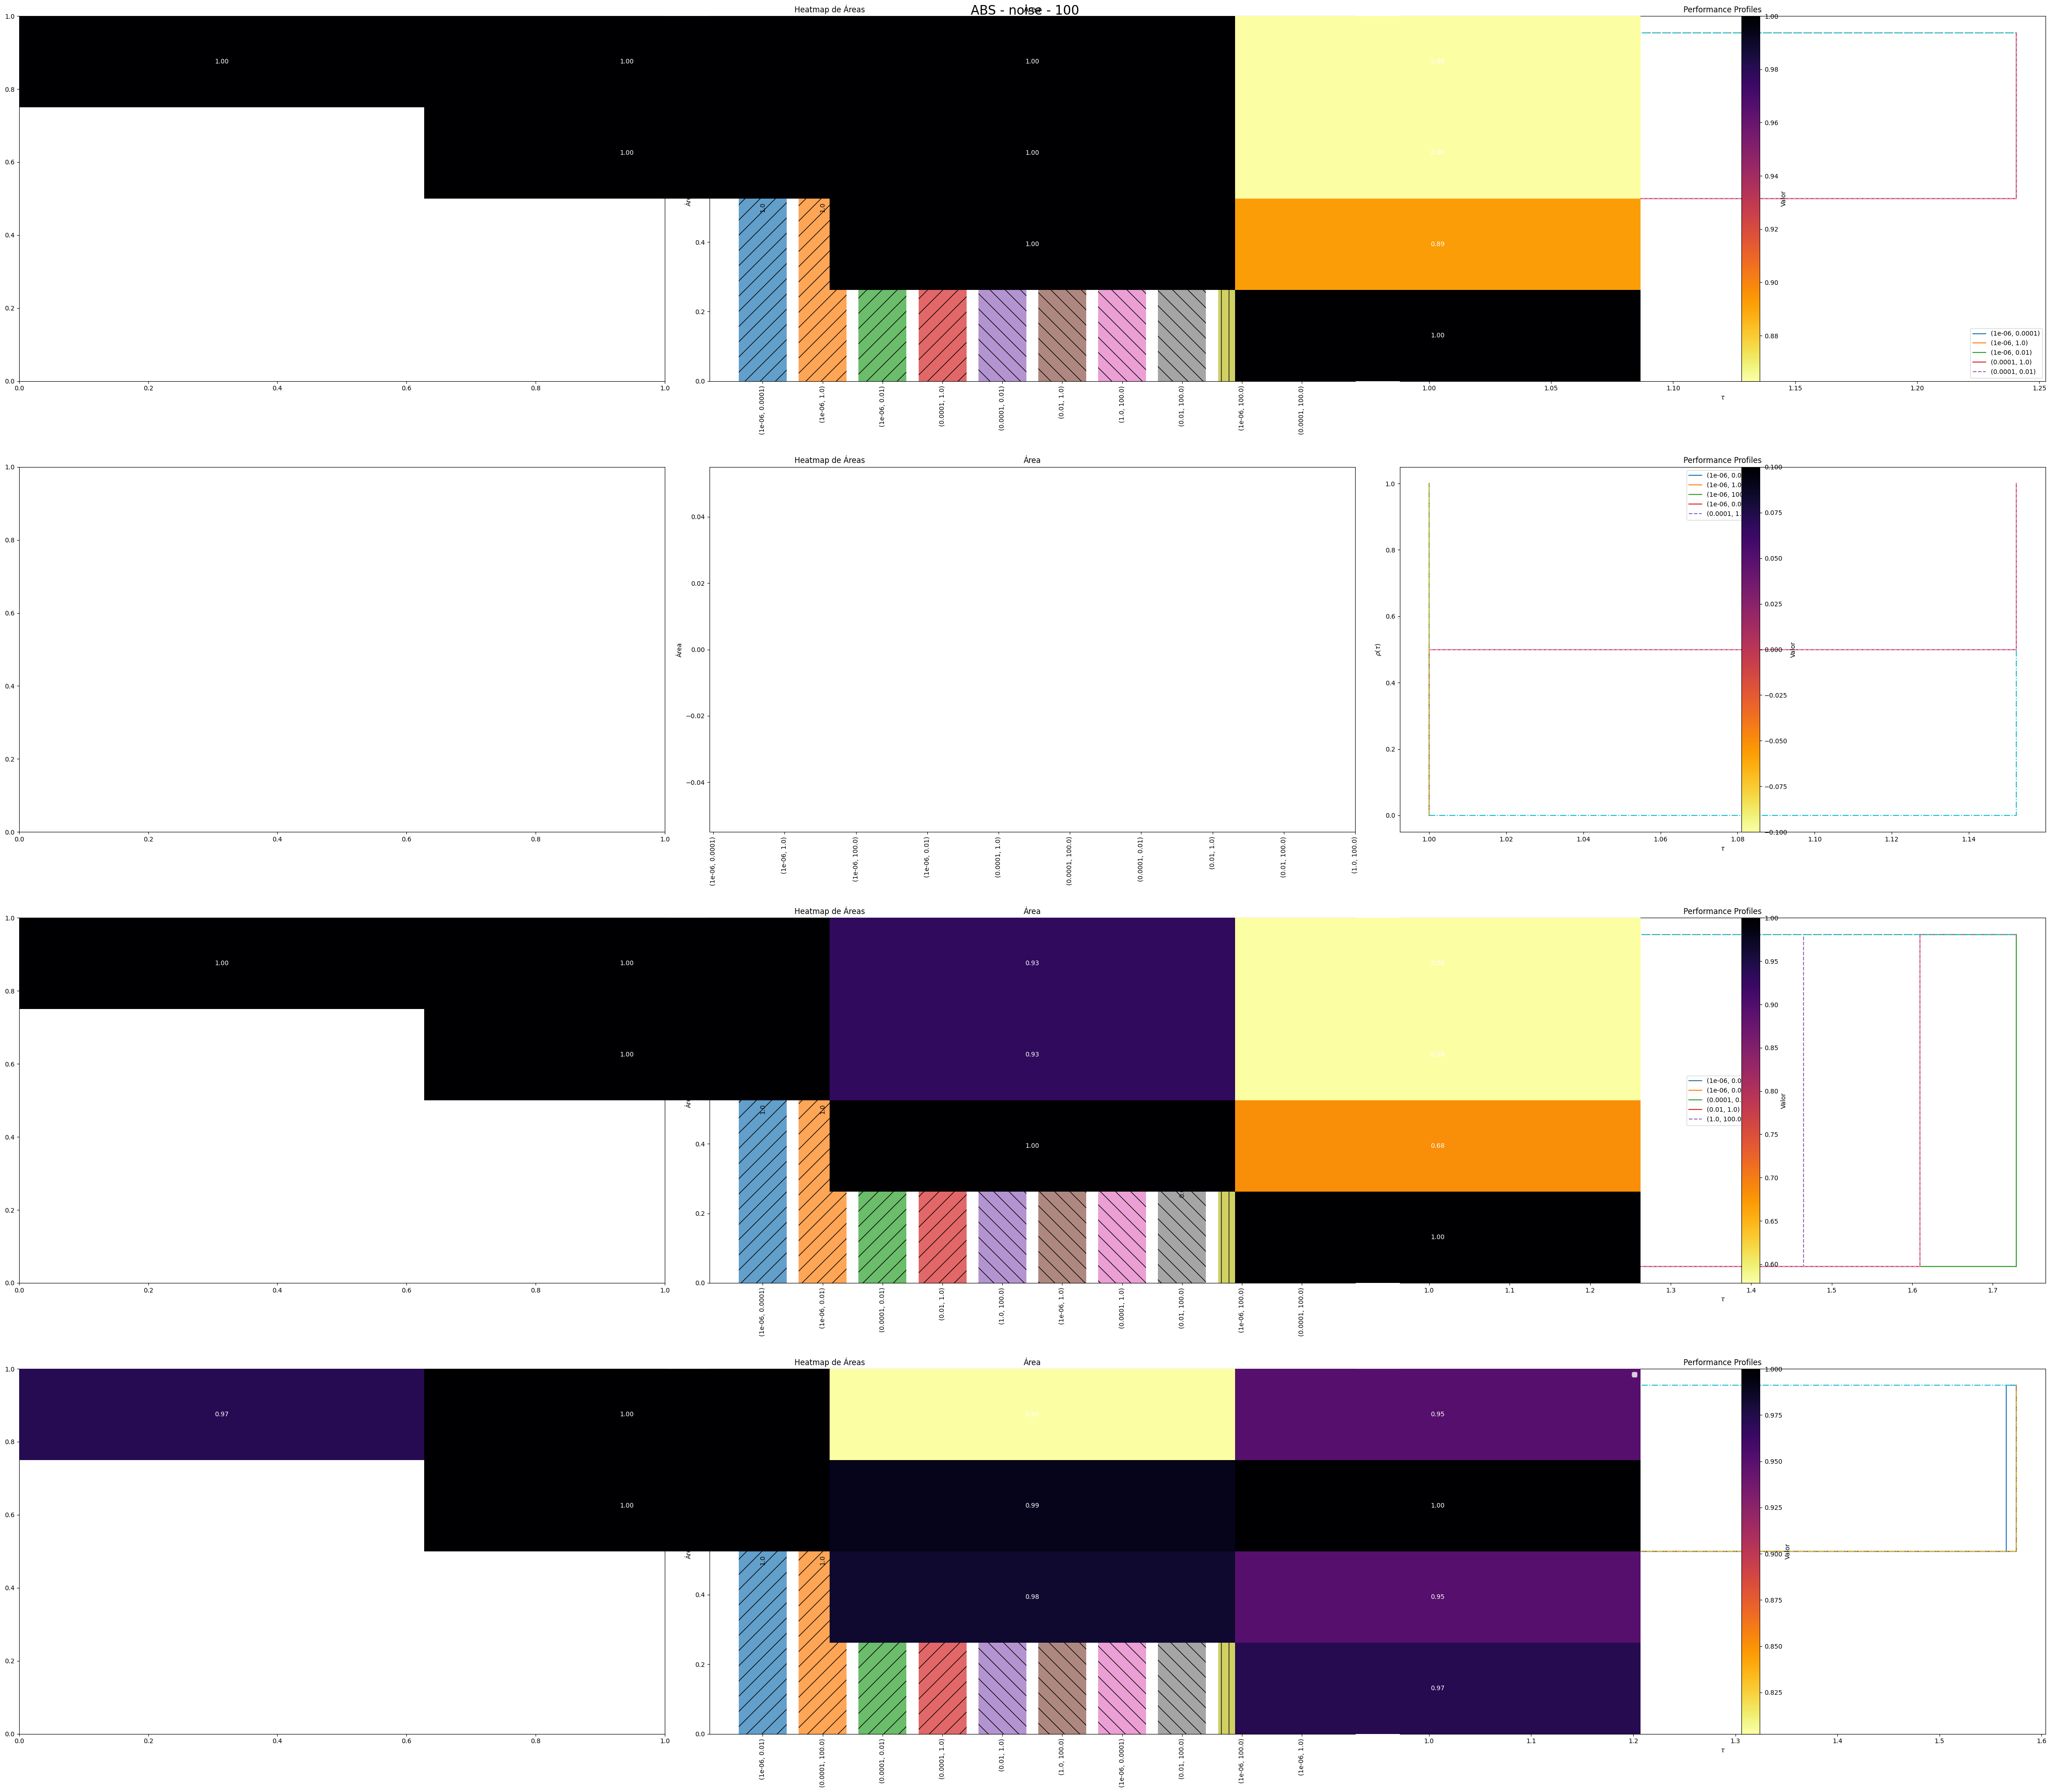

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


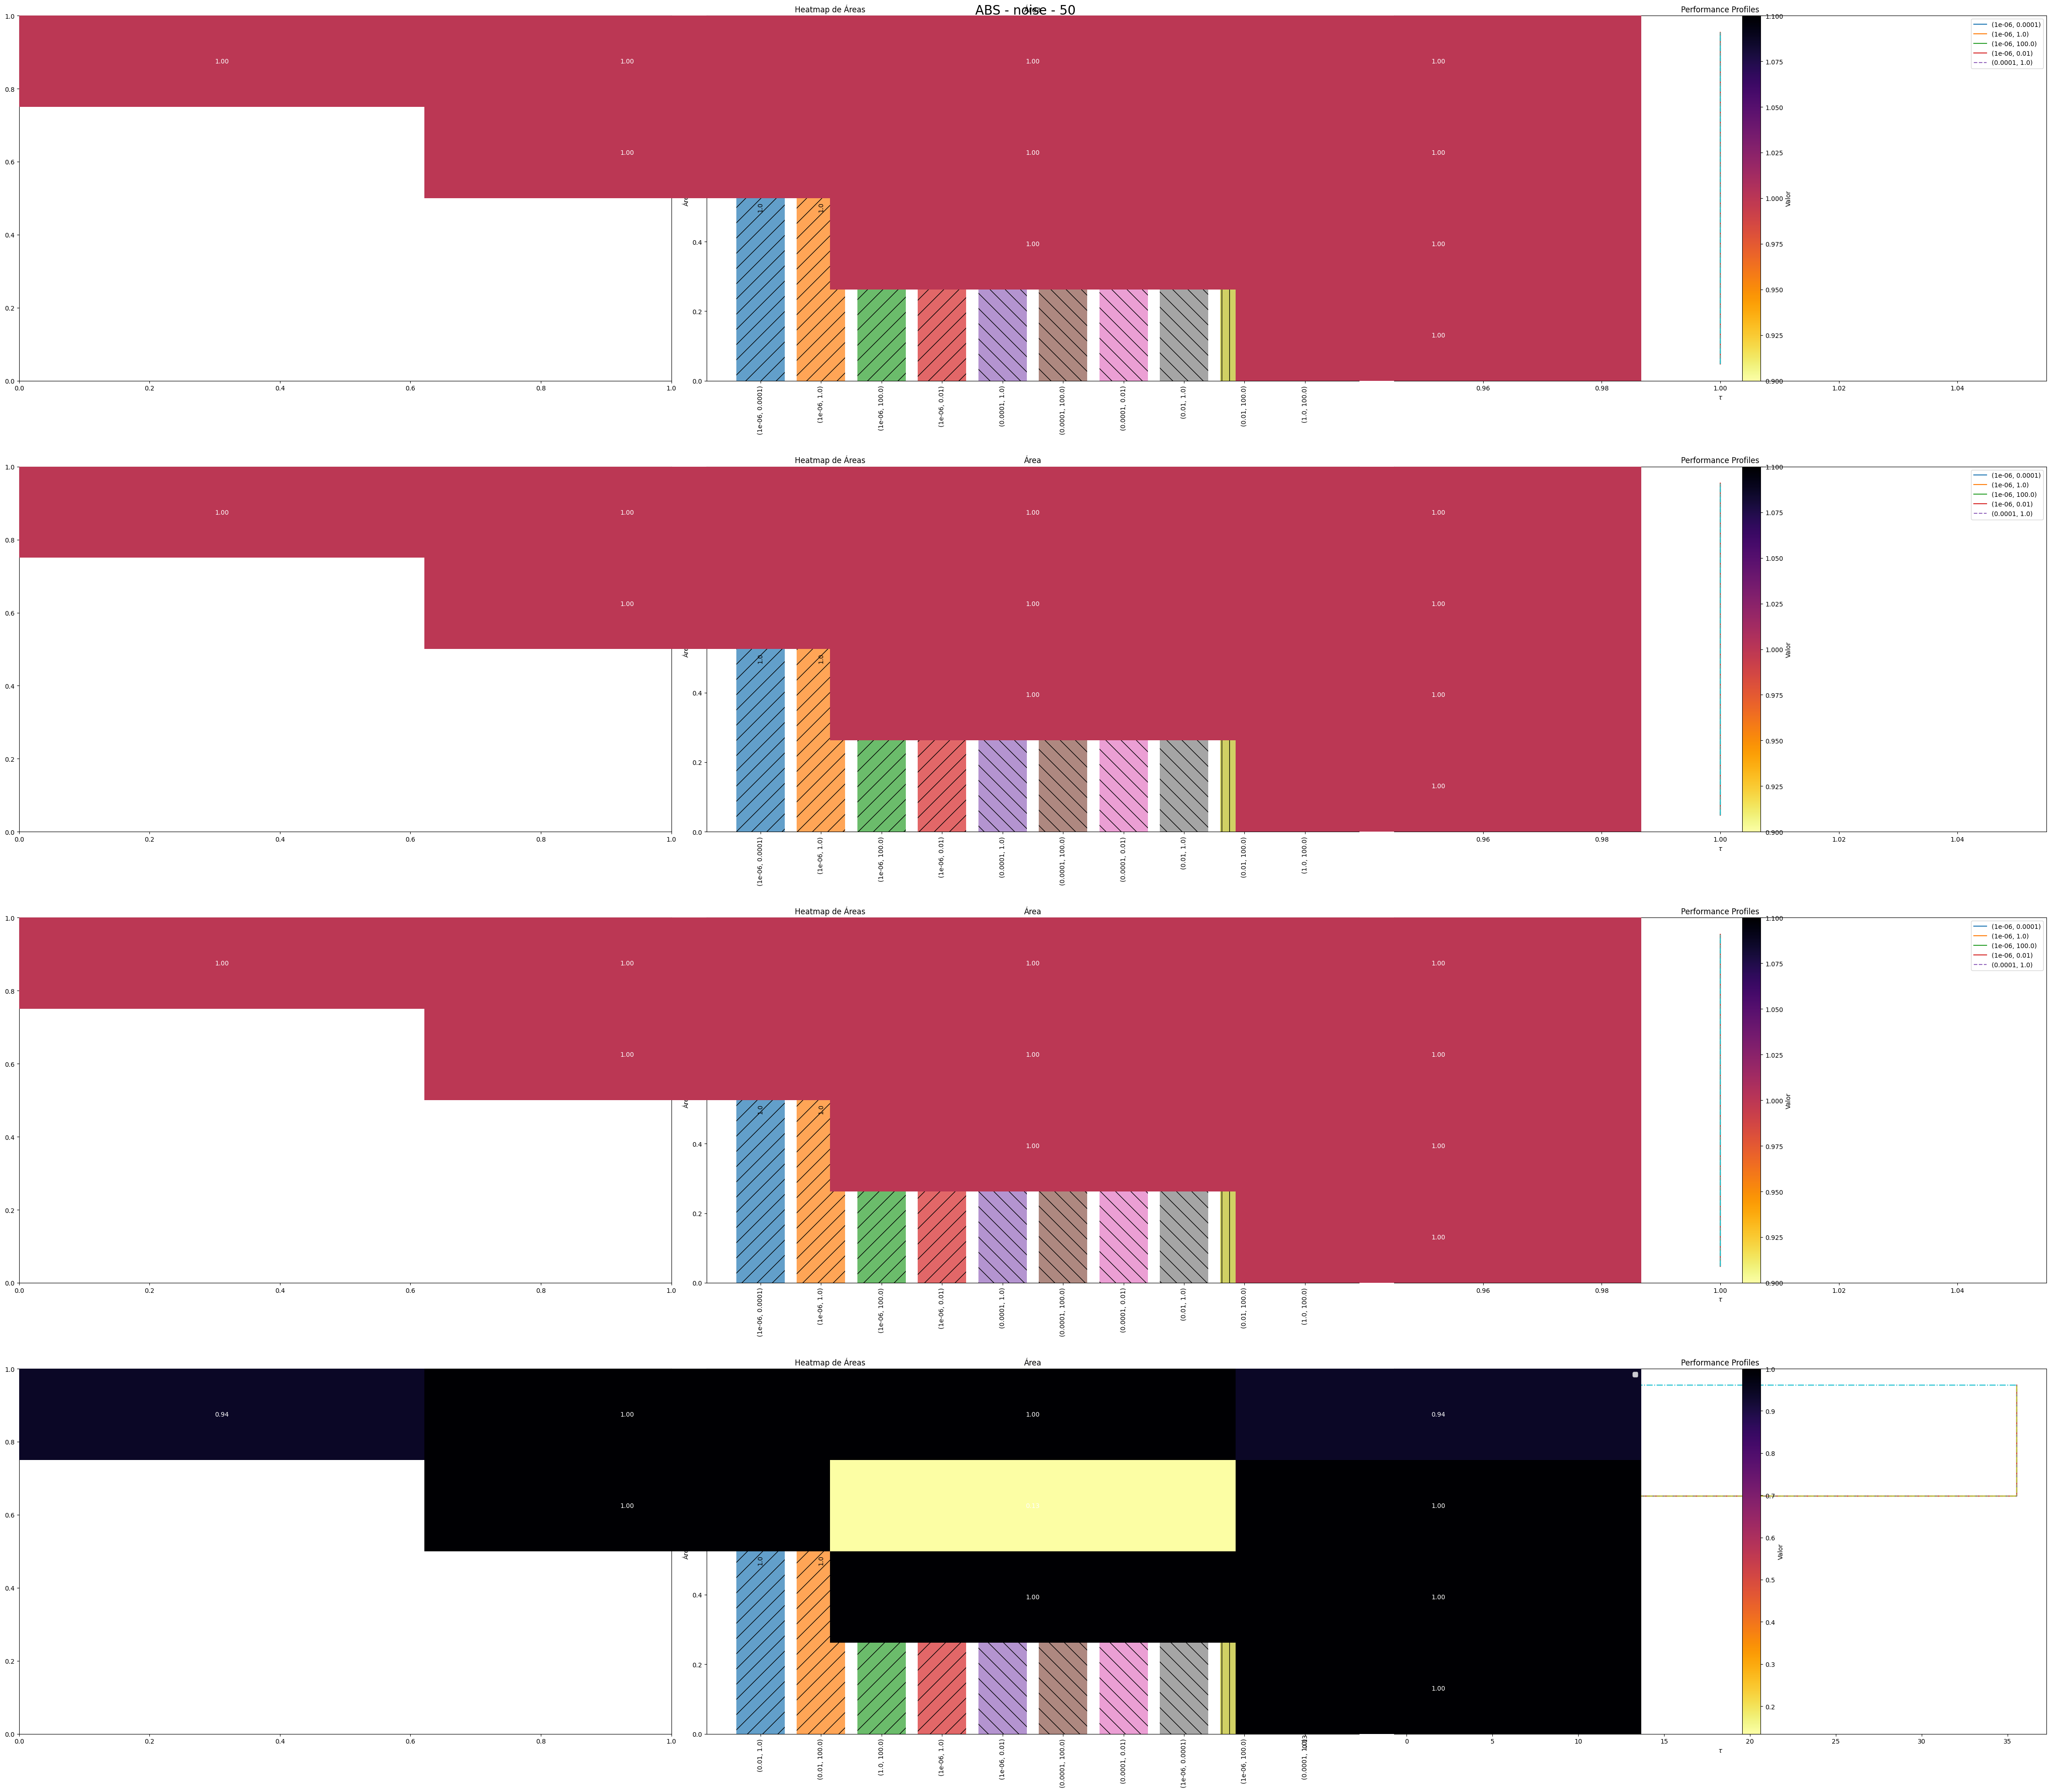

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


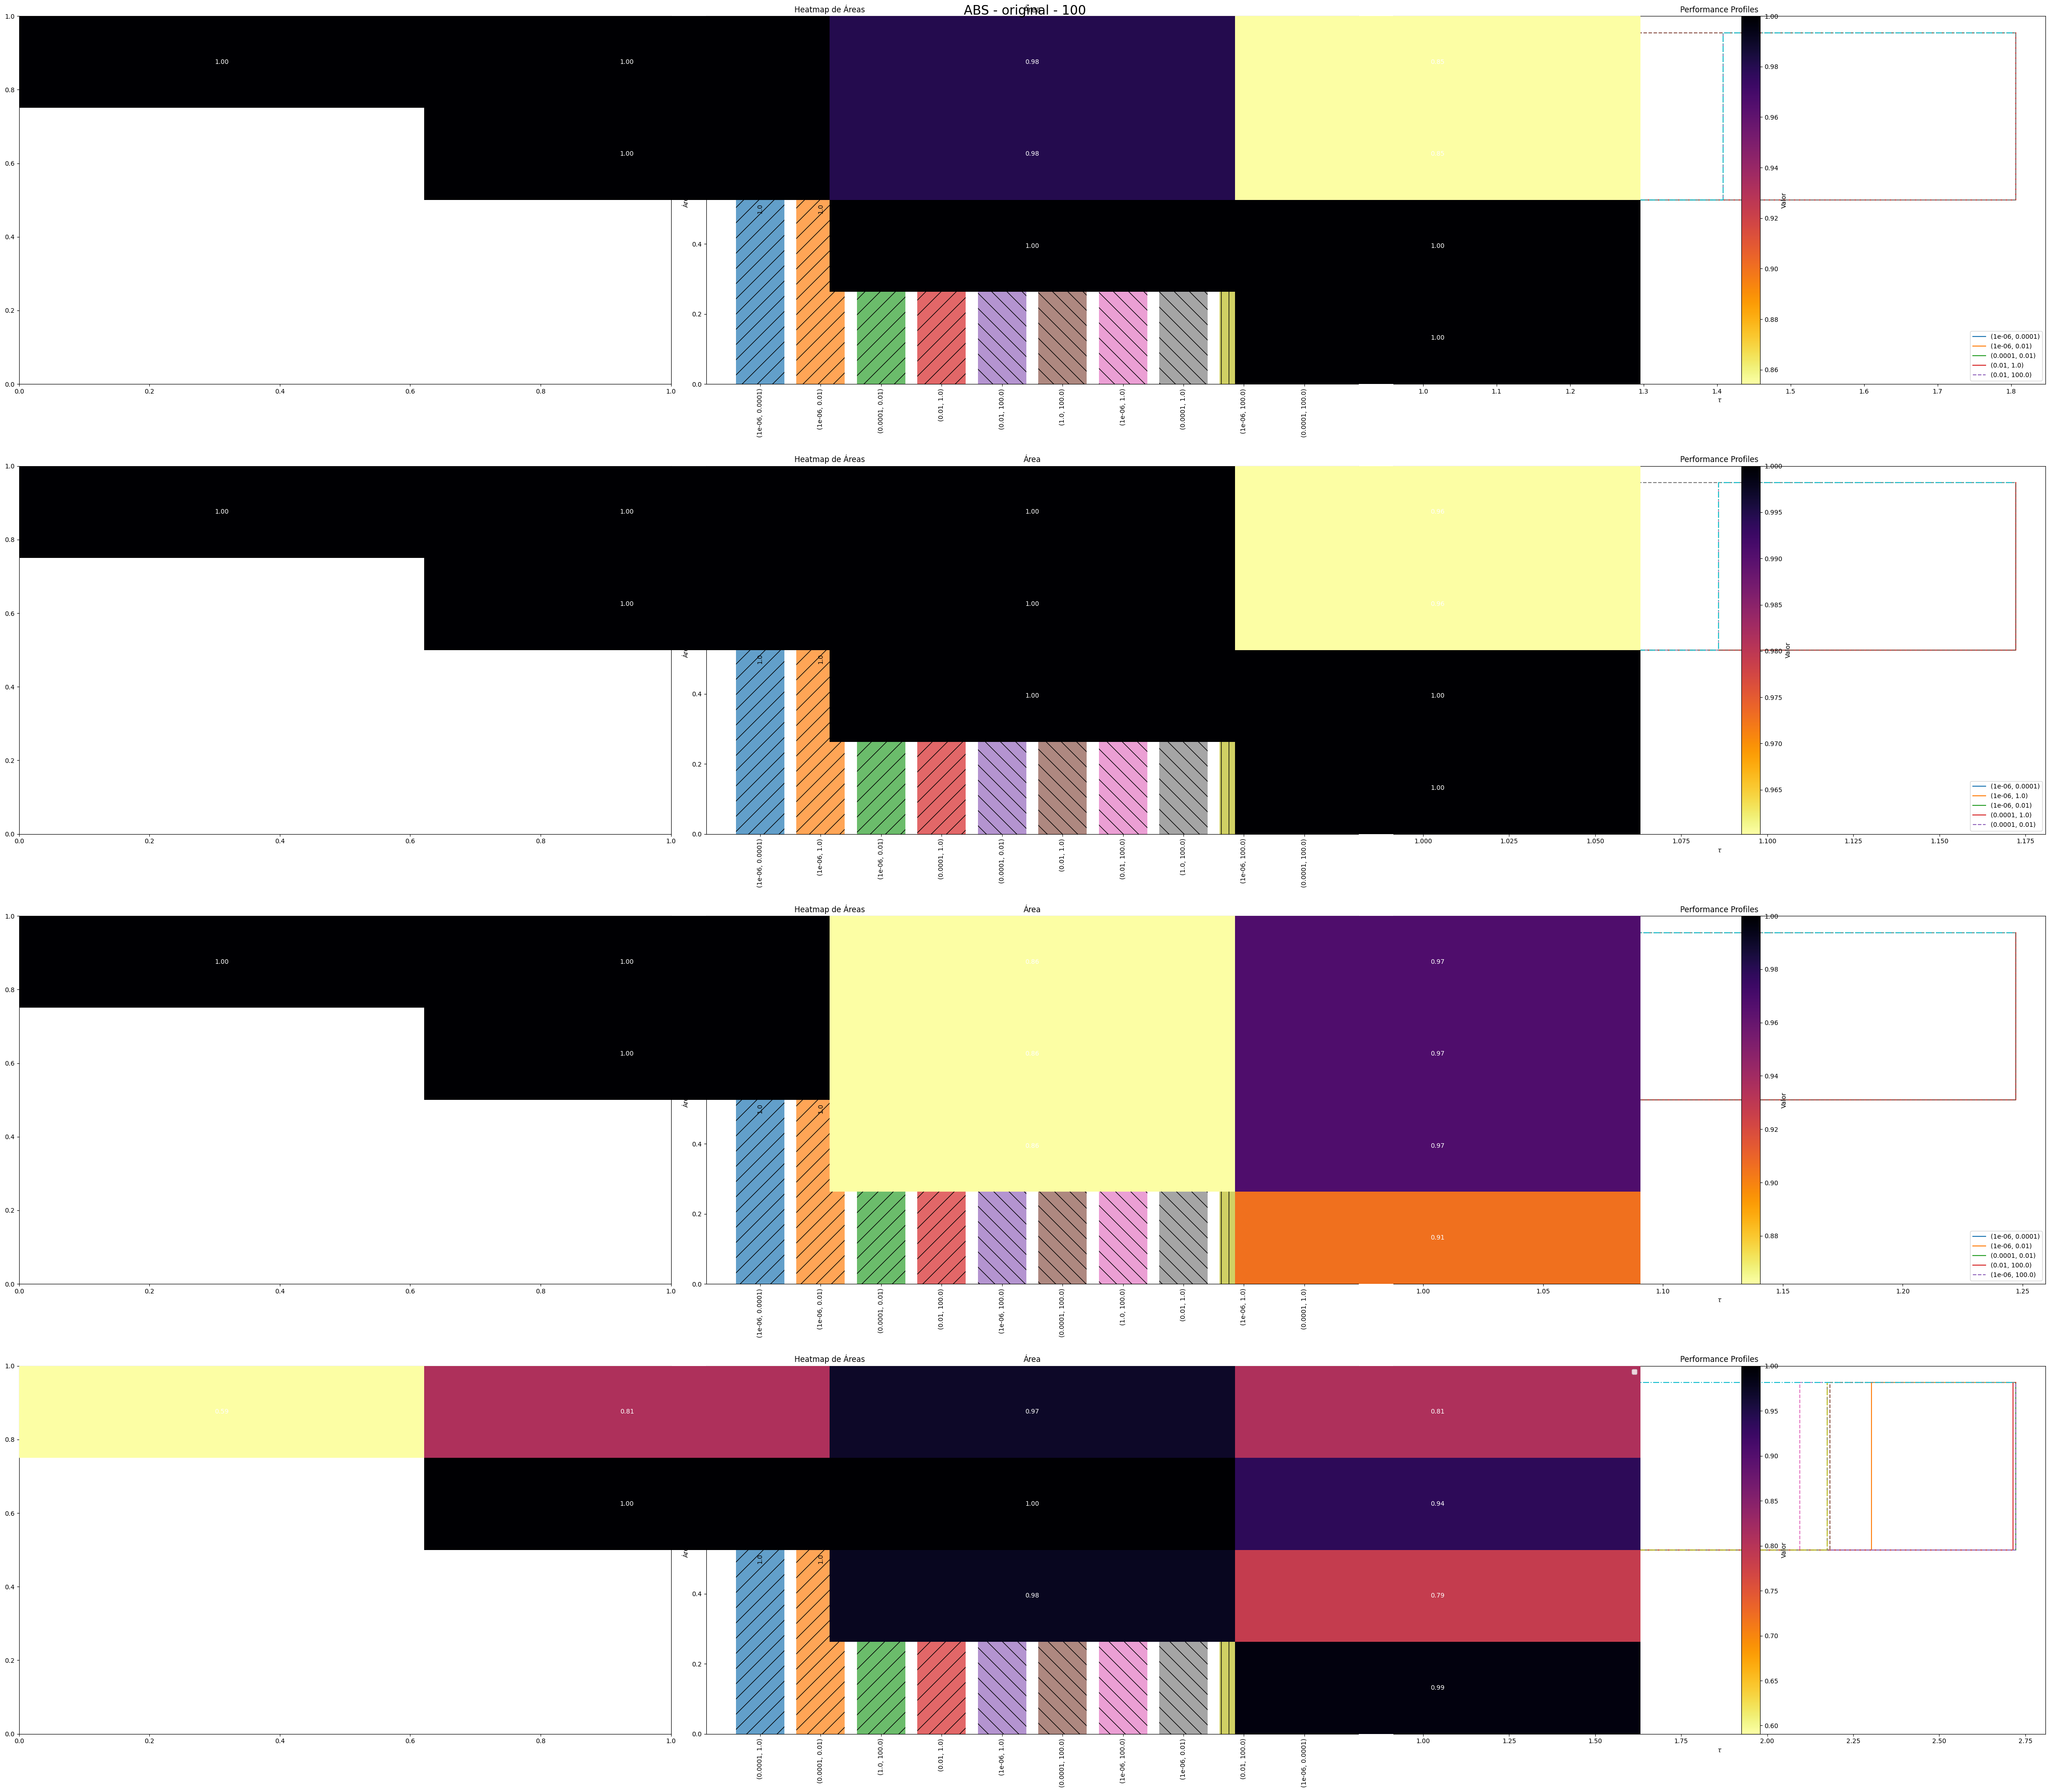

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


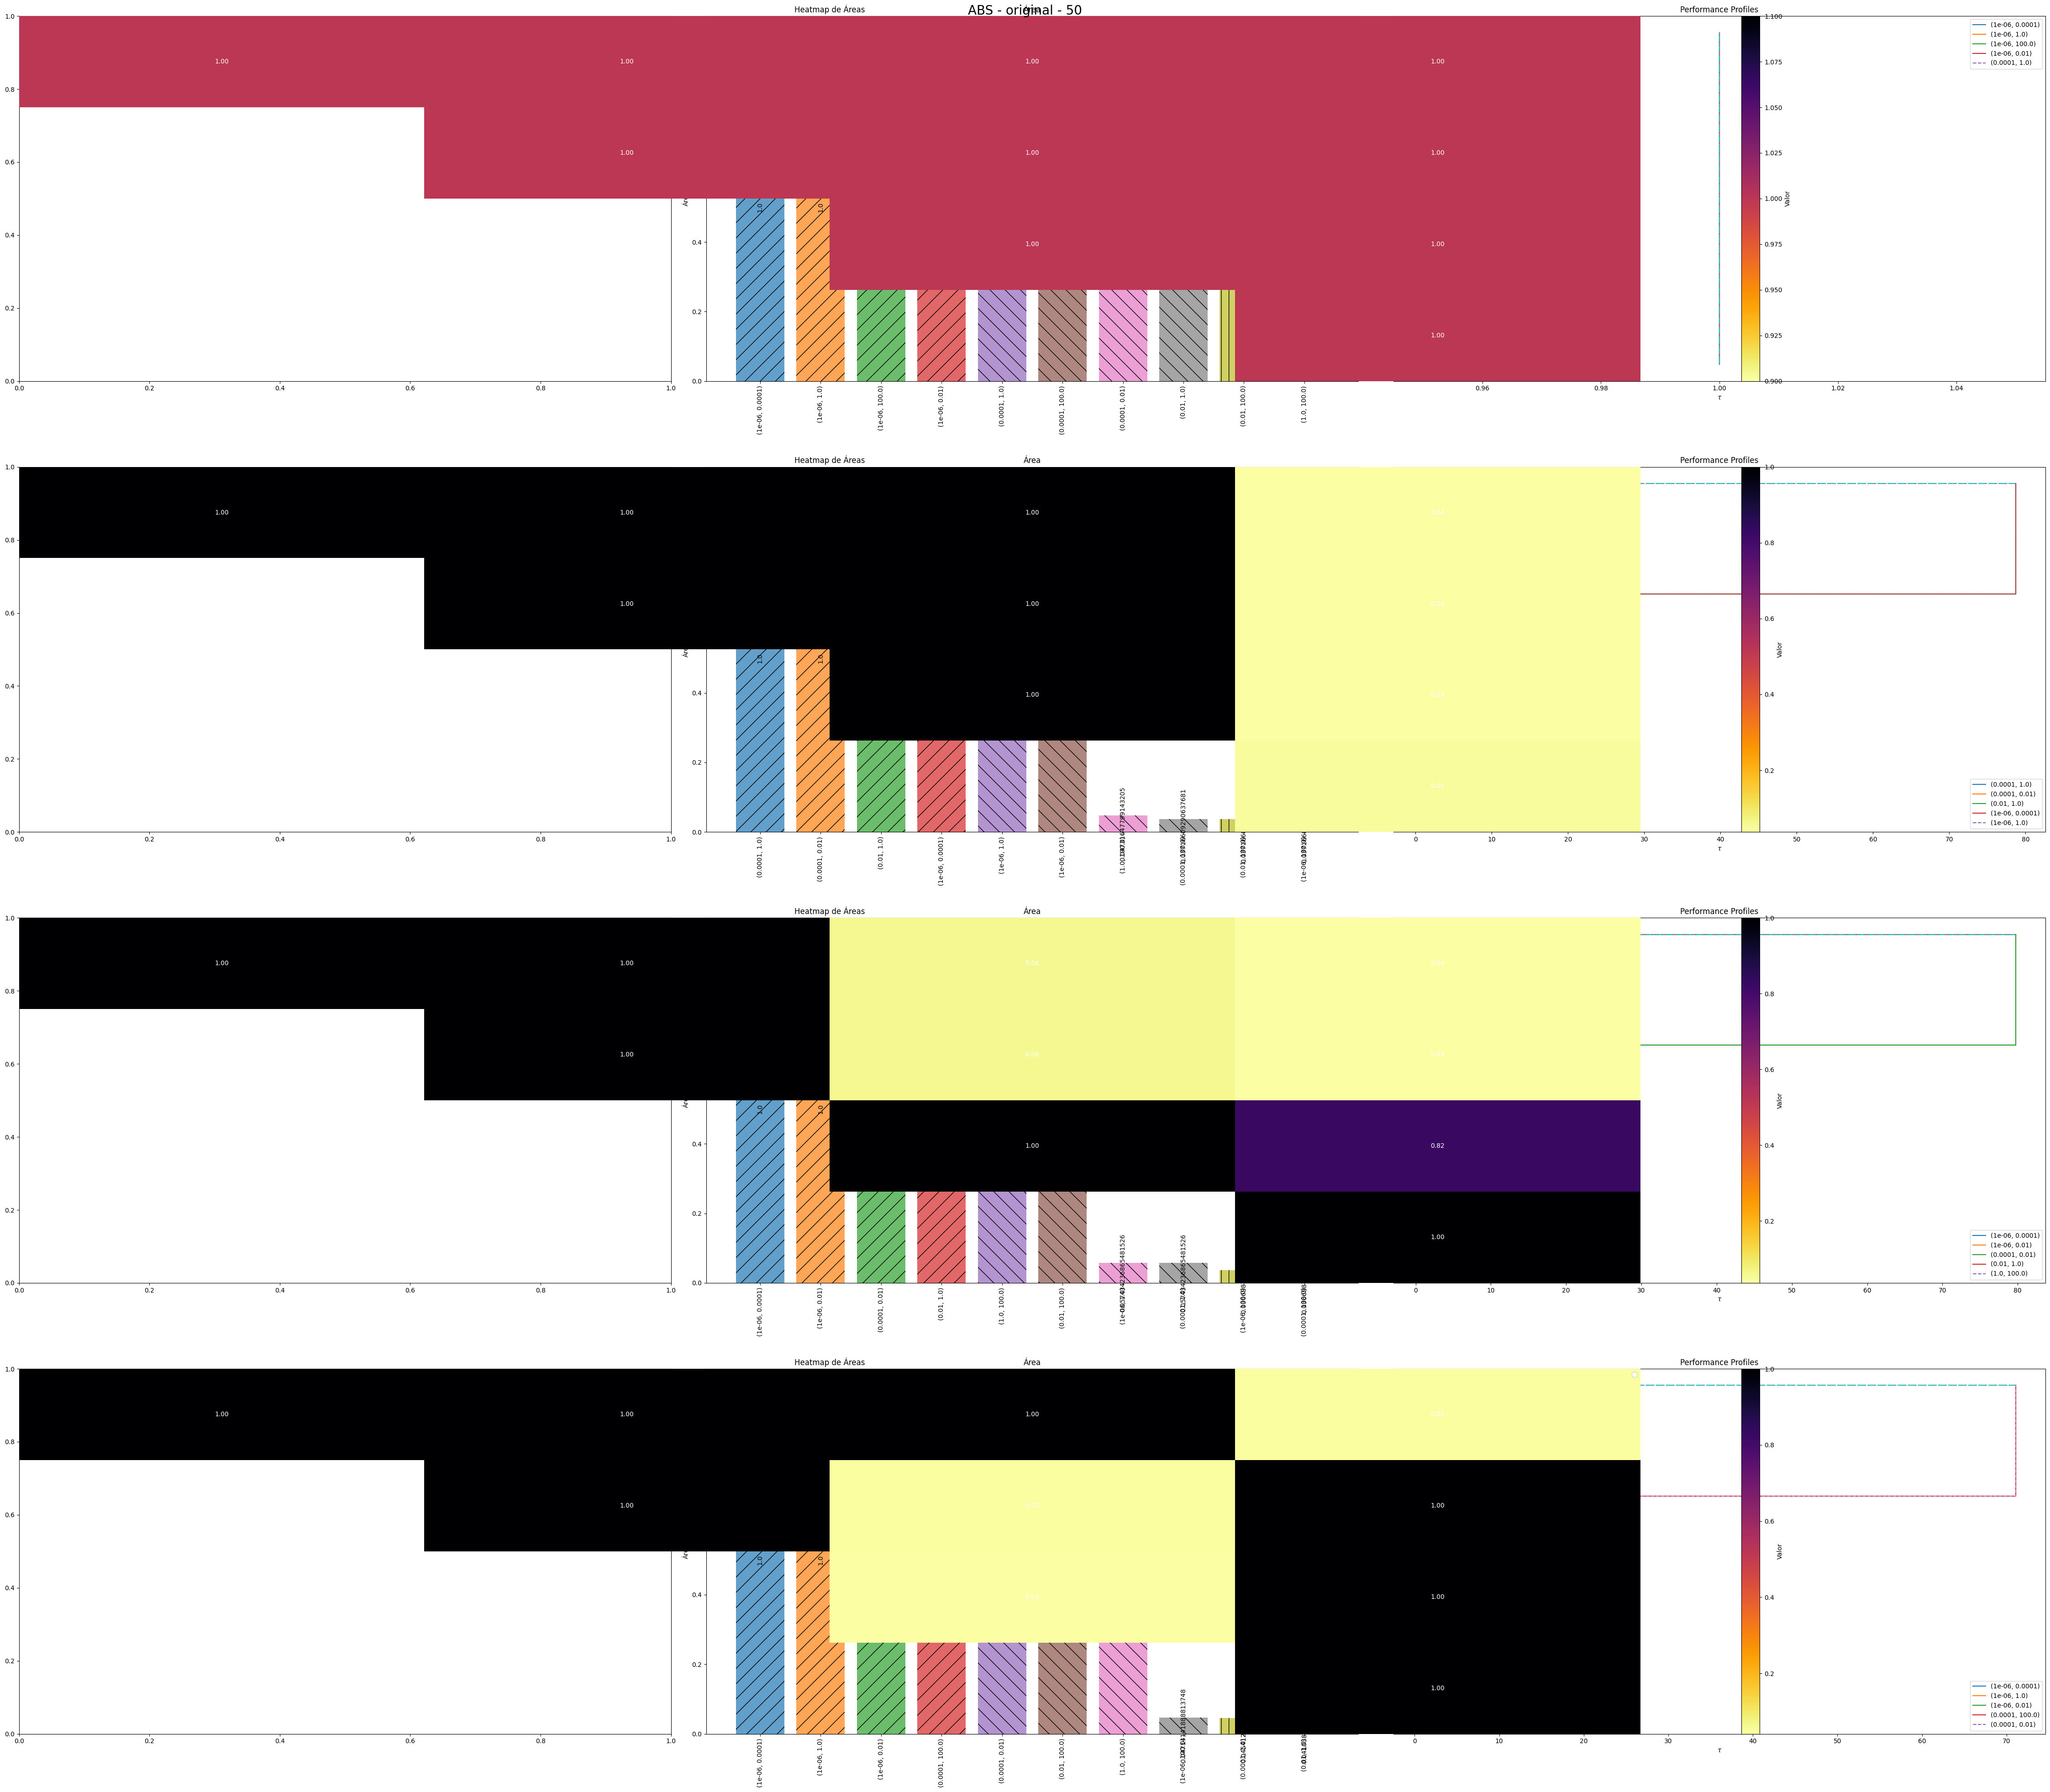

In [56]:
areas_df = []

for distance in grouped.distance.unique():
    for noise in grouped.noise.unique():
        for amount in grouped.amount.unique():
            
            fig, ax = plt.subplots(len(grouped.variation.unique()), 3, figsize=(45, 40))
            
            for v, variation in enumerate(grouped.variation.unique()):
                ax1 = ax[v][2]
                ax2 = ax[v][1]
                ax3 = ax[v][0]
                resume = pp_dfs[distance][noise][amount][variation]["df"]
                
                # Gráficos

                vet = []
                names = resume.columns

                for key in names:      
                    resume_ = np.array(resume[key])
                    resume_ = np.sort(resume_)
                    
                    h = 1. / len(resume)
                    linha = [[1, 0]]

                    for i in resume_:
                        linha.append([i, linha[-1][1]])
                        linha.append([i, linha[-1][1] + h])

                    linha = np.array(linha).T
                    # print(linha)
                    vet.append(linha[0,:])
                vet = np.array(vet).T
                maior = np.max(vet)
                maior = [[maior for _ in range(len(names))]]
                vet = np.concatenate([vet, np.array(maior)])
                
                vet = pd.DataFrame(vet)

                vet.columns = names
                vet['h'] = [h*(i//2) for i in range(len(vet))]
                
                # Lista de cores
                colors_styles = plt.cm.tab10([i % 10 for i in range(len(names))])

                # Lista de estilos de linha
                line_styles = ['-', '--', '-.', ':']
                
                # Padrões
                patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
                
                colors = []
                for l in range(len(line_styles)):
                    for color in colors_styles:
                        colors.append([color, line_styles[l], patterns[l]])
                        
                # Adicionar um eixo invisível para o título da linha
                ax3 = fig.add_subplot(len(grouped.variation.unique()), 1, v + 1, frame_on=False)
                ax3.axis('off')  # Esconder o eixo
                ax3.set_title(variation, fontsize=16, pad=20)
                
                # Calcula as áreas
                areas = {}
                for i in range(len(names)):
                    areas[names[i]] = np.trapz(vet['h'], vet[names[i]])
                
                for i in range(len(names)):
                    areas[names[i]] = areas[names[i]] / max(areas.values())
                    areas_df.append({
                        "distance": distance,
                        "noise": noise,
                        "amount": amount,
                        "variation": variation,
                        "parameters": names[i],
                        "area": areas[names[i]]
                    })
                    
                areas = dict(sorted(areas.items(), key=lambda item: item[1], reverse=True))
                names = list(areas.keys())[:]

                # Gráfico de barras à direita
                for i in range(len(names)):
                    ax2.bar(f"{names[i][0]} - {names[i][1]}", areas[names[i]], color=colors[i][0], hatch=patterns[(i // len(line_styles)) % len(line_styles)], alpha=0.7)
                    # Adicionando o valor dentro da barra
                    height = areas[names[i]]
                    ax2.text(
                        f"{names[i][0]} - {names[i][1]}",  # Posição x do texto (nome da barra)
                        height / 2,  # Posição y do texto (metade da altura da barra)
                        '{}'.format(height),  # Texto (valor da barra)
                        ha='center',  # Alinhamento horizontal do texto
                        va='center',  # Alinhamento vertical do texto
                        color='black',  # Cor do texto
                        fontsize=10,  # Tamanho da fonte
                        rotation=90
                    )
                ax2.set_title('Área')
                ax2.set_ylabel('Área')
                # Configurar labels na vertical
                ax2.set_xticks(range(len(names)))
                ax2.set_xticklabels([names[i] for i in range(len(names))], fontsize=10, rotation=90)
                plt.xticks(rotation=90)

                # Gráfico de linhas à esquerda
                for i in range(len(names)):
                    ax1.plot(vet[names[i]], vet['h'], color=colors[i][0], linestyle=line_styles[(i // len(line_styles)) % len(line_styles)], label = names[i] if i < 5 else None)
                
                ax1.set_title("Performance Profiles")                                      
                ax1.set_xlabel(fr'$\tau$')
                ax1.set_ylabel(fr'$\rho(\tau)$')
                ax1.legend()
                
                # Extrair os valores únicos de lower e upper
                lower_values = sorted(set(key[0] for key in areas.keys()))
                upper_values = sorted(set(key[1] for key in areas.keys()))

                # Criar a matriz de valores
                heatmap_data = np.full((len(lower_values), len(upper_values)), np.nan)
                for (lower, upper), value in areas.items():
                    i = lower_values.index(lower)
                    j = upper_values.index(upper)
                    heatmap_data[i, j] = value
                    
                # Heatmap (primeira linha, terceira coluna)
                im = ax3.imshow(heatmap_data, cmap='inferno_r', aspect='auto')

                # Adicionar valores nas células do heatmap
                for i in range(len(lower_values)):
                    for j in range(len(upper_values)):
                        text = ax3.text(j, i, f'{heatmap_data[i, j]:.2f}',
                                            ha='center', va='center', color='white')

                # Adicionar uma barra de cores
                cbar = fig.colorbar(im, ax=ax3, orientation='vertical')
                cbar.set_label('Valor')

                # Ajustar os rótulos e o título
                ax3.set_title('Heatmap de Áreas')
                ax3.set_xlabel('Upper')
                ax3.set_ylabel('Lower')

                # Definir os ticks e os labels
                ax3.set_xticks(np.arange(len(upper_values)))
                ax3.set_yticks(np.arange(len(lower_values)))
                ax3.set_xticklabels(upper_values)
                ax3.set_yticklabels(lower_values)
                plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
                        rotation_mode="anchor")

            plt.legend()
            plt.suptitle(f"{distance} - {noise} - {amount}", fontsize=20)
            plt.tight_layout()
            plt.show()
            # plt.savefig(f"pp/{distance} - {noise} - {amount} - {variation}.png")
            plt.close()